In [1]:
import numpy as np
from numpy import linalg as LA


import scipy
from scipy import linalg
from scipy import stats

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.utils.extmath import randomized_svd # esta funcion vamos a usar

In [2]:
matrix = []  # vamos a transformar el archivo .csv en un np.array
with open("co_occur.csv", "r") as f:
    for line in f:     # Phyton entiende que line es una fila
        currow = []
        entries = line.split(",") # entries es una list donde cada elemento es lo que esta entre ",". Pero sus elementos son
                                  # formato string. Hay que pasarlo a float
        for entry in entries:
            currow.append(float(entry))  # transforma la string en float
        matrix.append(currow)  # matrix no es aun un numpy array, es una lista, es mas eficiente hacer esto y al final 
                               # transformarlo en un numpy array.
matrix = np.array(matrix)  # transforma la lista matrix en un numpy array

In [3]:
np.save("co_occur.npy", matrix) # la guardamos, asi no tenemos que hacer lo anterior nuevamente

In [2]:
M = np.load("co_occur.npy") # abre el np.array guardado
M.shape

(10000, 10000)

In [6]:
words = []  # vamos a transformar el archivo .txt en una list de Python
with open("dictionary.txt", "r") as f:
    for line in f:
        words.append(line.replace("\n",""))
print(words[:10])   # el indice i corresponde al entry "i" tanto de fila como de columna de M
print("el indice de la palabra 'the' es: ", words.index("the")) # la funcion a.index("b") devuelve el
print("el indice de la palabra 'in' es: ", words.index("in"))  # indice de la "string" "b" en la la lista "a".

['the', 'of', 'in', 'and', 'to', 'was', 'is', 'for', 'on', 'as']
el indice de la palabra 'the' es:  0
el indice de la palabra 'in' es:  2


In [6]:
# Ejercicio 2
Mlog = np.log(1 + M) # esta matriz es simetrica
U, d, VT = randomized_svd(Mlog, n_components = 100)

In [7]:
print("U.shape = ", U.shape)
print("d.shape = ", d.shape)
print("VT.shape = ", VT.shape)
print(d[:10])

U.shape =  (10000, 100)
d.shape =  (100,)
VT.shape =  (100, 10000)
[14299.74306502  2864.81560151  2682.6537864   1745.55492021
  1528.41717494  1308.76186927  1185.74051684  1128.05264658
  1102.55714239   956.3077184 ]


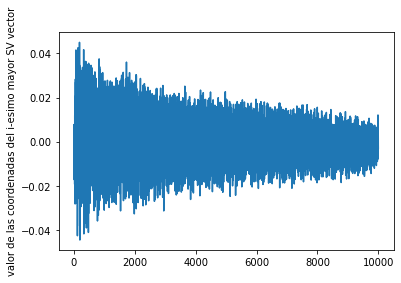

Indices de las coordenadas mas grandes en el vector 3
[ 131  320   68   66  183  828  148  383  394 1726]

Indices de las coordenadas mas chicas en el vector 3
[ 410  327  115  476 1984  196  774  189  802  379]

Palabras con las coordenadas mas grandes en el vector 3
['county', 'council', 'national', 'university', 'district', 'regional', 'government', 'department', 'northern', 'municipal']

Palabras con las coordenadas mas chicas en el vector 3
['my', 'love', 'album', 'me', 'baby', 'you', 'your', 'song', 'vocals', 'episode']


In [9]:
# Ejercicio 3

# ploteamos los valores de las coordenadas de los vectores
# juegue con diferentes valores de i
i = 3
plt.plot(U[:,i])
plt.ylabel('valor de las coordenadas del i-esimo mayor SV vector')
plt.show()

# extraemos los n_words indices de las max y min coordenadas
n_words = 10
largest_indexes = np.argpartition(U[:,i], -n_words)[-n_words:] # tomen esta funcion como viene...
smallest_indexes = np.argpartition(U[:,i], n_words)[:n_words]

print("Indices de las coordenadas mas grandes en el vector", i)
print(largest_indexes[::-1])
print("\nIndices de las coordenadas mas chicas en el vector", i)
print(smallest_indexes[::-1])


print("\nPalabras con las coordenadas mas grandes en el vector", i)
print([words[idx] for idx in largest_indexes[::-1]])
print("\nPalabras con las coordenadas mas chicas en el vector", i)
print([words[idx] for idx in smallest_indexes[::-1]])

In [10]:
# Ejercicio 4. (a)
Ushape = U.shape  #  = (10000, 100)
U2 = U**2
Un = np.sqrt(np.sum(U2,axis = 1)).reshape(Ushape[0],1)
U_rawnorm = U/Un # las filas de U_rawnorm estan normalizadas a 1
# y U_rawnorm[i,:] es la "mejor" proyeccion 100D de la palabra i

In [11]:
man_index = words.index("man")
woman_index = words.index("woman")
v1 = U_rawnorm[woman_index,:].reshape(Ushape[1],1) # vector proyeccion 100D de la palabra "woman"
v2 = U_rawnorm[man_index,:].reshape(Ushape[1],1) # vector proyeccion 100D de la palabra "man"
v = v1 - v2 # vector tal que sumado al vector man (v2) da el vector woman (v1)
v = v/LA.norm(v)

In [12]:
list_i = ["boy", "girl", "brother", "sister", "king", "queen", "he", "she", "john", "mary", "wall", "tree"]

In [13]:
Proy_words = np.zeros((len(list_i), Ushape[1]))
# matriz cuyas filas son las proyecciones 100D de las palabras en list_i
i = 0
for word in list_i:
    index = words.index(word)
    Proy_words[i,:] = U_rawnorm[index,:]
    i += 1

In [14]:
# Proyeccion, en la direccion de v, de las proyecciones 100D de las palabras en list_i
PrWords_v = np.dot(Proy_words, v)

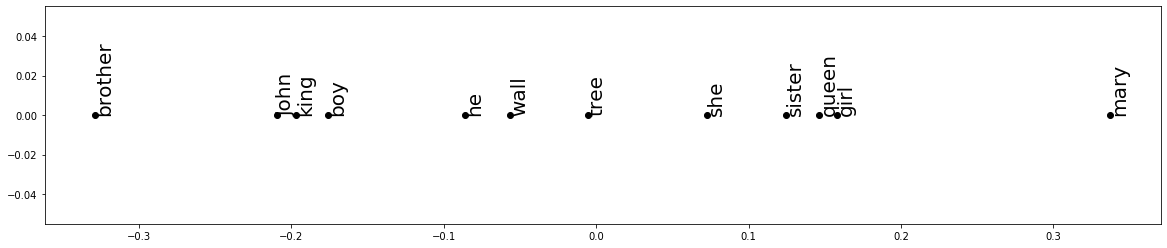

In [15]:
xs = [0] * len(list_i)

fig, ax = plt.subplots(figsize=(20,4))

plt.clf()
plt.plot(PrWords_v, xs, 'o', color='black')

for i in range(len(list_i)):
    plt.text(PrWords_v[i],0,list_i[i], {'ha': 'left', 'va': 'bottom'}, fontsize = 20, rotation=90)
plt.show()

In [16]:
# Ejercicio 4. (b) (si solucion aca)



In [17]:
# Ejercicio 5. (a)
# definimos la funcion "closest_word"

# repetimos esto para recordarlo
Ushape = U.shape  #  = (10000, 100)
U2 = U**2
Un = np.sqrt(np.sum(U2,axis = 1)).reshape(Ushape[0],1)
U_rawnorm = U/Un # las filas de U_rawnorm estan normalizadas a 1
# y U_rawnorm[i,:] es la "mejor" proyeccion 100D de la palabra i

def closest_word(w):   # w debe ser una "word"
    w_index = words.index(w)
    v_w = U_rawnorm[w_index,:].reshape(Ushape[1],1) # proyeccion 100D de w
    
    U_exceptw = np.copy(U_rawnorm) # muy ineficiente uso de memoria...
    U_exceptw[w_index,:] = 0  # reemplazamos de U_rawnorm la fila correspondiente a w por ceros
    # esto es ineficiente en cuanto a memoria, hay mejores soluciones, pero tiene la virtud de
    # no cambiar los indices de las palabras, como hubiese pasado si, por ejemplo, hubiesemos
    # usado np.delete
    
    cos_allexcept_w = np.dot(U_exceptw, v_w) # como las filas de U_exceptw estan normalizadas
    # a 1, cos_sim_all es un vector con componentes iguales al cos del angulo entre las
    # proyecciones 100D de todas las palabras y la de la palabra w.
    
    index_closest = np.argmax(cos_allexcept_w)  # si a U_rawnorm no le hubiesemos reemplazado a v_w
                                                # por ceros, la mas cercana hubiese sido v_w. 
    return words[index_closest] # retorna la palabra cuya proyeccion 100D tiene el cos
                                # del angulo con la proyyeccion de w mas cercano a 1.

In [19]:
# jueguecon distintas palabras
print("palabra mas cercana a 'man' = ", closest_word("man"))
print("palabra mas cercana a 'woman' = ", closest_word("woman"))

palabra mas cercana a 'man' =  woman
palabra mas cercana a 'woman' =  girl


In [20]:
# Ejercicio 5. (b)

analogies = []  # vamos a transformar el archivo .txt en un np.array
with open("analogy_task.txt", "r") as f:
    for line in f:     # Phyton entiende que line es una fila
        currow = line.replace("\n","").split(" ") # la operacion "split" toma una string y devuelve una list
        analogies.append(currow)
analogies[:10]  # analogies es una list de python, no un numpy array. list es mas flexible que np.array, por ejemplo no
                # todas las filas de una lista tiene que tener el mismo numero de elementos

[['athens', 'greece', 'bangkok', 'thailand'],
 ['athens', 'greece', 'beijing', 'china'],
 ['athens', 'greece', 'berlin', 'germany'],
 ['athens', 'greece', 'cairo', 'egypt'],
 ['athens', 'greece', 'canberra', 'australia'],
 ['athens', 'greece', 'helsinki', 'finland'],
 ['athens', 'greece', 'london', 'england'],
 ['athens', 'greece', 'madrid', 'spain'],
 ['athens', 'greece', 'moscow', 'russia'],
 ['athens', 'greece', 'oslo', 'norway']]

In [21]:
# funcion que automatiza la respuesta a analogias
# el input tiene que ser la lista de las primeras 3
# palabras de la analogia, aunque si contiene
# las 4 palabras funciona igual, y no lee la cuarta

def analogia(w):
    w1_index = words.index(w[0])
    w2_index = words.index(w[1])
    w3_index = words.index(w[2])
    
    v1 = U_rawnorm[w1_index,:].reshape(Ushape[1],1)
    v2 = U_rawnorm[w2_index,:].reshape(Ushape[1],1)
    v3 = U_rawnorm[w3_index,:].reshape(Ushape[1],1)
    
    v = v2 - v1 + v3
    
    U_except = np.copy(U_rawnorm) 
    U_except[w1_index,:] = 0
    U_except[w2_index,:] = 0
    U_except[w3_index,:] = 0
    
    
    cos_allexcept = np.dot(U_except, v)
    index_closest = np.argmax(cos_allexcept)
    
    return words[index_closest]

In [25]:
# juegue con analogias
w = ["man", "woman", "king"]
print(w[0], " es a ", w[1], " como ", w[2], " es a?")
print(analogia(w))

man  es a  woman  como  king  es a?
queen


In [27]:
# analogias del archivo "analogy_task.txt"
# i de 0 a 5584

i = 3000
print("ANALOGIA: ", analogies[i][0], " es a ", analogies[i][1], " como ", analogies[i][2], " es a?")
print("respuesta humana = ", analogies[i][3])
print("respuesta maquina = ", analogia(analogies[i]))

ANALOGIA:  see  es a  seeing  como  jump  es a?
respuesta humana =  jumping
respuesta maquina =  jumping


In [26]:
# calcule precision del algoritmo